# Hypothesis testing: 1-Sample t-test (1stt)

check https://www.statology.org/one-sample-t-test/

Calculate a one-sample t-test twice. 
1. approach manually: see the maths and reasoning behind it (help with comprehension and help you to design better experiments.)
2. shorter coding way : where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# I. The manual approach

## 1.&nbsp; Describe the problem
Define the initial question for which the truth is not known.

Suspecting that WBSCS are smarter than the general population, you designed an experiment and randomly sampled 45 WBS CODING SCHOOL students, who took an IQ test and their result was 130. The average IQ is 100. Test whether or not WBSCS students are likely to be smarter than the regular population.

In [58]:
wbscs_students = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73, 
 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108, 
 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116, 
 182, 144, 127, 216, 71, 200, 182, 71, 129]

In [59]:
wbscs_s = pd.Series(wbscs_students)

## 2.&nbsp; State the Null Hypothesis(H0) and the Alternative Hypothesis(H1)

- H0 : WBSCS are as smart as any other students  pmean = 100
- H1 : WBSCS are smarter than usual pmean > 100 (upper tail)

In [60]:
pmean = 100

## 3.&nbsp; Select an appropriate significance level alpha ($\alpha$).

alpha can vary from 0.1 ,0.05 up to 0.01 (signficance level)
Depend on how much certin you want your test result to be 
Certinity inc --> aplha decrease

In [61]:
alpha = 0.05

## 4.&nbsp; Consider the statistical assumptions about the set of data.

- The variable under study should be either an interval or ratio variable.
- The observations in the sample should be independent.
- The variable under study should be approximately normally distributed. You can check this assumption by creating a histogram and visually checking if the distribution has roughly a “bell shape.”
- The variable under study should have no outliers. You can check this assumption by creating a boxplot and visually checking for outliers.

#### a.&nbsp; The variable under study should be either an interval or ratio variable.

In [62]:
smean = wbscs_s.mean()
smean

130.0222222222222

#### b.&nbsp; The observations in the sample should be independent.
This something has to be assumed that the student were chosen randomly, and that thus, their scores are independent.

#### c.&nbsp; The variable under study should be approximately normally distributed.

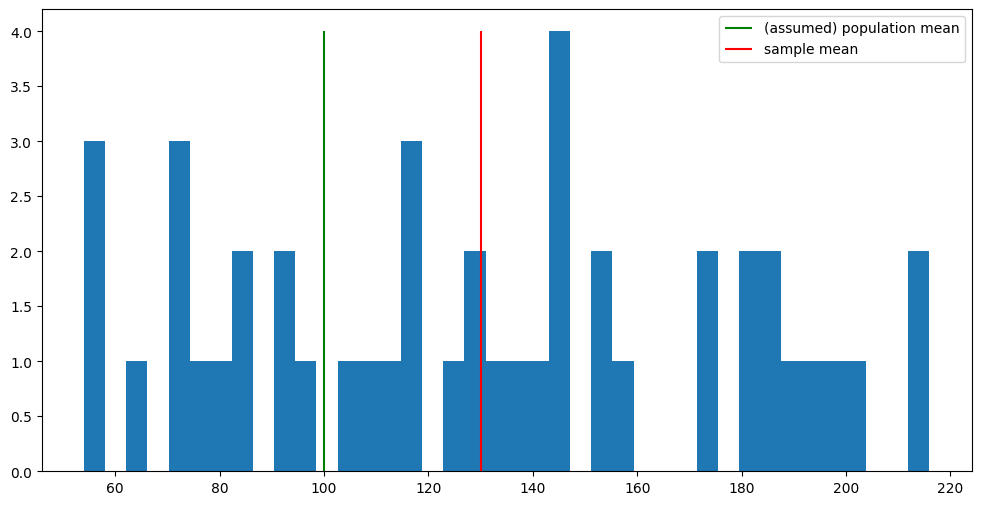

In [63]:
plt.figure(figsize=(12,6))
# Plot a histogram of the sample.
yp, xp, _ = plt.hist(wbscs_s, bins=40)
# Add a vertical line for the population mean.
plt.vlines(pmean, ymin=0, ymax=max(yp), color="green", label="(assumed) population mean")
# Add a vertical line for the sample mean.
plt.vlines(smean, ymin=0, ymax=max(yp), color="red", label="sample mean")
plt.legend()
plt.show()

#### d.&nbsp; The variable under study should have no EXTREME outliers.
This condition is useful to ensure that the mean does not get shifted to either side by a small number of extreme values. In such a case, the mean would only give a distorted image of the dataset's center, and this would impact the meaningfulness of the entire test.

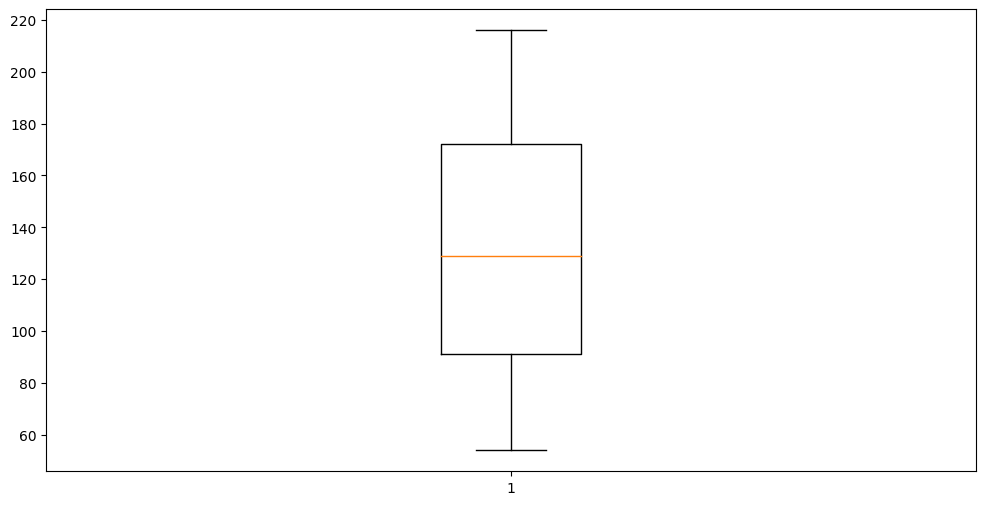

In [64]:
plt.figure(figsize=(12,6))
# Plot a boxplot of the sample.
plt.boxplot(wbscs_s);

In [65]:
Q1 = wbscs_s.quantile(0.25)
Q3 = wbscs_s.quantile(0.75)
IQR = Q3-Q1
outliers = wbscs_s.loc[(wbscs_s < Q1-1.5*IQR)|(wbscs_s > Q3+1.5*IQR)]

In [66]:
len(outliers)/len(wbscs_s)

0.0

## 5.&nbsp; Decide on the appropriate test to use and the associated test statistic.



![image.png](assistant_hypothesis.gif)

In this case 1stt

## 6.&nbsp; Derive the distribution of the test statistic.
The t-score follows a **student's t-distribution with n-1 degrees of freedom**.
- Ideally t distributions are tends to be = to normal distribution as n (sample size) gets bigger
- n --> smaple size Accepted value starts from 30
- ddof --> delta degree of freedom are the number of values that we need to be able to fully control our test statistic (ie smean), in this case we can allow all n value to vary , and we can control only 1 datapoint to be able bring our smean to any valu we want , hence ddof=1
- dof --> degree of freedom = n-ddof

In [67]:
n = len(wbscs_s)
ddof = 1
dof = n-1
dof

44

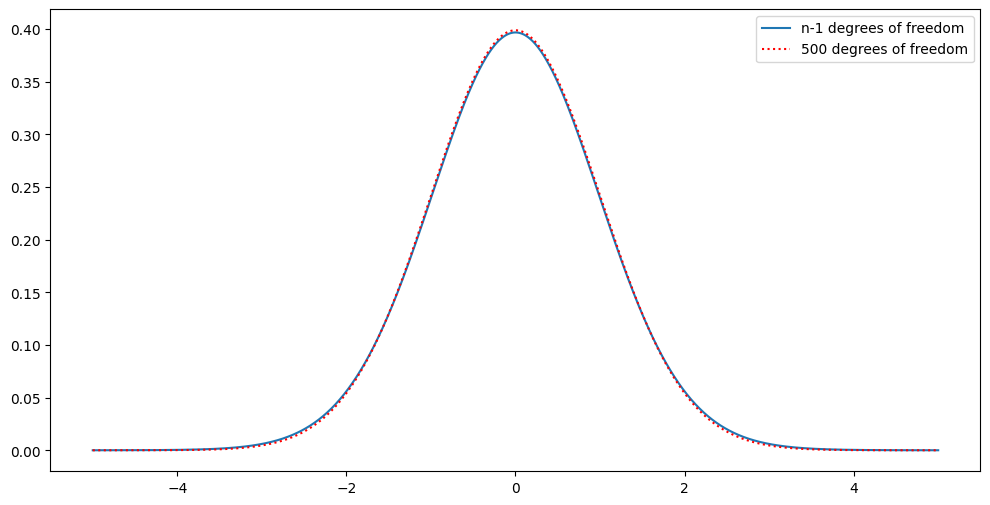

In [68]:
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
yf = stats.t.pdf(xt,dof)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, yf, label="n-1 degrees of freedom")
plt.plot(xt, stats.t.pdf(xt,500), color="red", linestyle="dotted" ,label="500 degrees of freedom")
plt.legend()
plt.show()

## 7.&nbsp; Compute the test statistic using the data set.
for 1stt --> $t = \frac{\bar{x} – μ} {\frac{s}{\sqrt{n}}}$:

In [69]:
s=wbscs_s.std(ddof=ddof)
s

46.83747959646735

In [70]:
tscore = (smean-pmean)/(s/np.sqrt(n))
tscore

4.2998724719737265

## 8.&nbsp; Derive the critical region associated with the level of alpha.
Not too long ago, people used large tables like [this](https://www.statology.org/here-is-how-to-find-the-p-value-from-the-t-distribution-table/) to look up the critical values associated with a certain level of alpha.
- if you perform a two-sided test, you need two critical values.Since t-distribution is symmetrical, the same is true for the critical values.The second critical value is thus -ve of the one from the table
- if you want the lower tail --> set the Critical values from table to -ve

In [71]:
#alpha = 0.1 , onetail(upper tail), df=44   --> critical value = 1.3
crit_val = 1.3

## 9.&nbsp; Compare the test statistic with the critical values.

The test statistic is in the critical region because it is more extreme as the critical value.
For this reason, the null Hypothesis will be rejected.

In [76]:
if crit_val > tscore:
  print("The critical value is larger than t-score. H0 --> Fail to reject")
else:
  print("The critical value is smaller than t-score. H0 --> rejected")

The critical value is smaller than t-score. H0 --> rejected


# II. The coders approach

In [72]:
t_score, p_value = stats.ttest_1samp(a = wbscs_s, popmean= pmean, alternative='greater')

In [75]:
if p_value > alpha:
  print("The p-value is larger than alpha. H0 --> Fail to reject")
else:
  print("The p-value is smaller than alpha. H0 --> rejected")

The p-value is smaller than alpha. H0 --> rejected


# III. Visualization

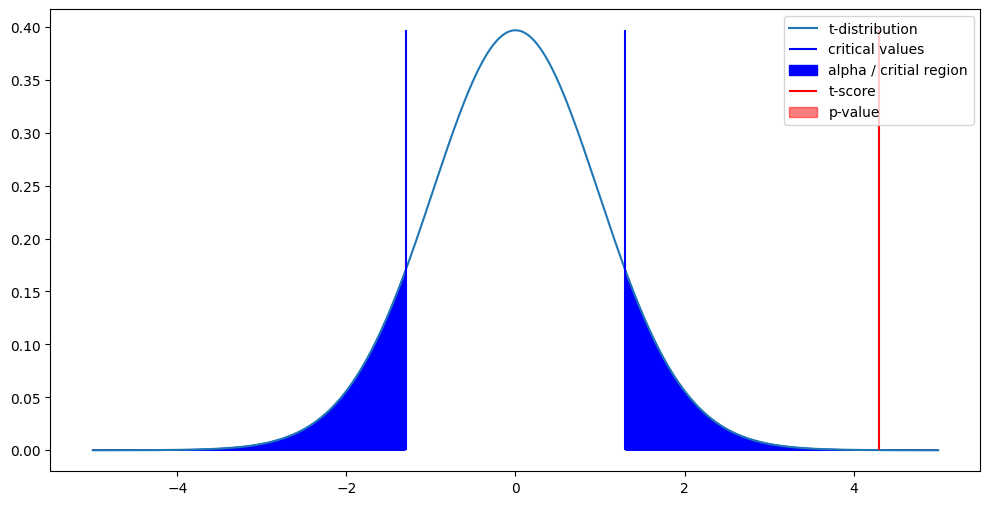

In [74]:
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
yf = stats.t.pdf(xt,dof)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, yf, label="t-distribution")

# Shade the area under the curve for values more extreme than +/-crit_val (= alpha).
plt.vlines(-crit_val, ymin=0, ymax=max(yf), color="blue", label="critical values")
plt.vlines(crit_val, ymin=0, ymax=max(yf), color="blue")
plt.fill_between(xt, yf, where=(-crit_val>xt)|(xt>crit_val), color= "b", label="alpha / critial region")

# Shade the region in the tails that is more extreme than the +/-t-score (= p-value).
plt.vlines(tscore, ymin=0, ymax=max(yf), color="red", label="t-score")
plt.fill_between(xt, yf, where=(-abs(t_score)>xt)|(xt>abs(t_score)), color= "r", alpha=0.5, label="p-value")


plt.legend()
plt.show()